In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_excel("KAtracecovid_19.xlsx")

In [4]:
df.head()

,Case,Date,Age,Sex,City,State,Nationality,Status,Secondary_infection,Outdate,survival_time,age_class,Sex_code
0,1,2020-03-09,41.0,M,Bangalore-Urban,Karnataka,India,alive,1,2020-03-27,18,3,1
1,2,2020-03-10,1.0,F,Bangalore-Urban,Karnataka,India,alive,0,2020-03-24,14,1,0
2,3,2020-03-10,13.0,F,Bangalore-Urban,Karnataka,India,alive,0,2020-03-27,17,1,0
3,4,2020-03-12,76.0,M,Kalburgi,Karnataka,India,dead,0,2020-03-13,1,4,1
4,5,2020-03-13,26.0,M,Bangalore-Urban,Karnataka,India,alive,0,2020-03-20,7,3,1


In [5]:
pd.isna(df).sum()
df["Age"].fillna(round(df.Age.mean()),inplace = True)

In [6]:
pd.isna(df).sum()

Case                   0
Date                   0
Age                    0
Sex                    0
City                   0
State                  0
Nationality            0
Status                 0
Secondary_infection    0
Outdate                0
survival_time          0
age_class              0
Sex_code               0
dtype: int64

In [7]:
df1=df.iloc[:,[2,3,8,10,7]]

In [8]:
df1

,Age,Sex,Secondary_infection,survival_time,Status
0,41.0,M,1,18,alive
1,1.0,F,0,14,alive
2,13.0,F,0,17,alive
3,76.0,M,0,1,dead
4,26.0,M,0,7,alive
5,32.0,M,0,14,alive
6,63.0,M,1,15,alive
7,20.0,F,0,15,alive
8,67.0,F,1,13,alive
9,25.0,M,0,13,alive


In [9]:
df1['Status']=np.where(df1['Status']=="alive",0,1)
df1['Sex']=np.where(df1['Sex']=="F",0,1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
df1.head()

,Age,Sex,Secondary_infection,survival_time,Status
0,41.0,1,1,18,0
1,1.0,0,0,14,0
2,13.0,0,0,17,0
3,76.0,1,0,1,1
4,26.0,1,0,7,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df1.drop('Status',axis=1).values  ### independent features
y=df1['Status'].values   ### dependent features


In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
# pip install --user imbalanced-learn

In [19]:
from imblearn.over_sampling import SMOTE
import pandas as pd


# Create an instance of SMOTE
smote = SMOTE()

# Apply SMOTE to oversample the minority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# X_resampled contains the resampled feature vectors
# y_resampled contains the corresponding resampled target labels

# Now you can use X_resampled and y_resampled as your balanced dataset for modeling
# Make sure to split it into training and testing/validation sets before training your model


In [21]:
X_train_resampled.shape,X_train.shape

((40376, 4), (21008, 4))

In [40]:
y_train_resampled = y_train_resampled.reshape(-1,1)

In [54]:
!pip install torch

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x04B4C1B0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/torch/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x04B4C6F0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/torch/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x04B4C7F0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/torch/
  Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken b

In [55]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

ModuleNotFoundError: No module named 'torch'

In [16]:
## creating Tensors 
X_train = torch.FloatTensor(X_train_resampled)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train_resampled)
y_test = torch.LongTensor(y_test)


In [17]:
df1.shape

(26261, 5)

In [18]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=4,hidden1=8,hidden2=8,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.torch.sigmoid(self.f_connected1(x))
        x=F.torch.sigmoid(self.f_connected2(x))
        x=self.out(x)
        return x

In [19]:
torch.manual_seed(20)
model = ANN_Model()

In [20]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=4, out_features=8, bias=True)
  (f_connected2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=2, bias=True)
)>

In [21]:
###Backward Propagation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.05)

In [22]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 1.448913812637329
Epoch number: 11 and the loss : 0.16973267495632172
Epoch number: 21 and the loss : 0.1921200305223465
Epoch number: 31 and the loss : 0.17896218597888947
Epoch number: 41 and the loss : 0.16653276979923248
Epoch number: 51 and the loss : 0.16571396589279175
Epoch number: 61 and the loss : 0.16516733169555664
Epoch number: 71 and the loss : 0.1649349182844162
Epoch number: 81 and the loss : 0.16494494676589966
Epoch number: 91 and the loss : 0.16483768820762634
Epoch number: 101 and the loss : 0.16490519046783447
Epoch number: 111 and the loss : 0.1648770272731781
Epoch number: 121 and the loss : 0.16488862037658691
Epoch number: 131 and the loss : 0.16483792662620544
Epoch number: 141 and the loss : 0.1648196130990982
Epoch number: 151 and the loss : 0.1648632436990738
Epoch number: 161 and the loss : 0.16487495601177216
Epoch number: 171 and the loss : 0.16483710706233978
Epoch number: 181 and the loss : 0.16483929753303528
Epoch numbe

In [23]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

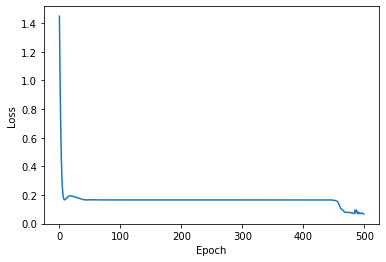

In [24]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [25]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0


0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[5045,    5],
       [  81,  122]], dtype=int64)

In [27]:
import seaborn as sns

Text(69.0, 0.5, 'Predicted Values')

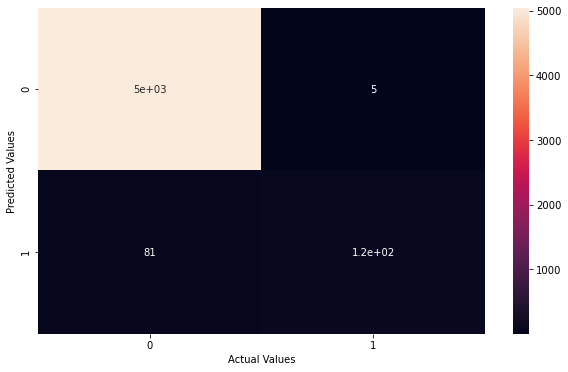

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [29]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.9836284028174377

In [30]:
#### Save the model
torch.save(model,'KA_trace1.pt')

In [31]:
#### Save And Load the model
model=torch.load('KA_trace1.pt')

In [32]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=4, out_features=8, bias=True)
  (f_connected2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=2, bias=True)
)

In [33]:
### Predcition of new data point
list(df1.iloc[3,:-1])

[76.0, 1.0, 0.0, 1.0]

In [34]:
list1=[76.0,1.0,0.0,1.0]

In [35]:
new_data=torch.tensor(list1)

In [36]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([-0.0190, -0.0059])
1


In [37]:
### Predcition of new data point2
list2=list(df1.iloc[26260,:-1])
list2

[62.0, 1.0, 0.0, 0.0]

In [38]:
new_data=torch.tensor(list2)

In [39]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([-0.0190, -0.0060])
1


In [40]:
list3 =[5, 1.0, 1.0, 0.0]
new_data3=torch.tensor(list3)
with torch.no_grad():
    print(model(new_data3))
    print(model(new_data3).argmax().item())


tensor([ 0.4062, -0.3958])
0
